In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from pandas.api.types import is_string_dtype

In [2]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
def kdeplot(data, fname, tname):
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.kdeplot(data=data, hue = fname, x = tname, ax = ax, linewidth=2,)
    ax.tick_params(axis="x", rotation=90, labelsize=10, length=0)
    ax.set_title(fname)
    ax.set_xlim(0, data[tname].quantile(0.99))
    plt.show()

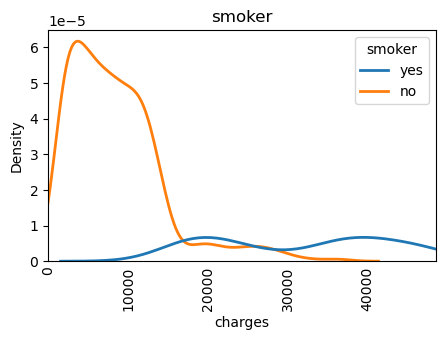

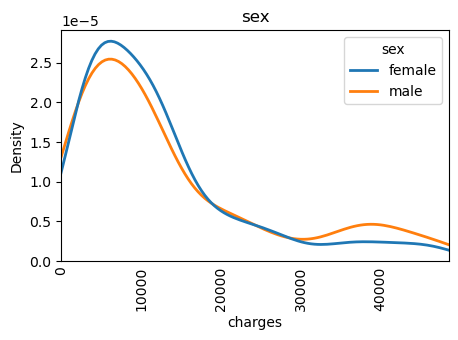

In [4]:
kdeplot(data, 'smoker', 'charges')
kdeplot(data, 'sex', 'charges')

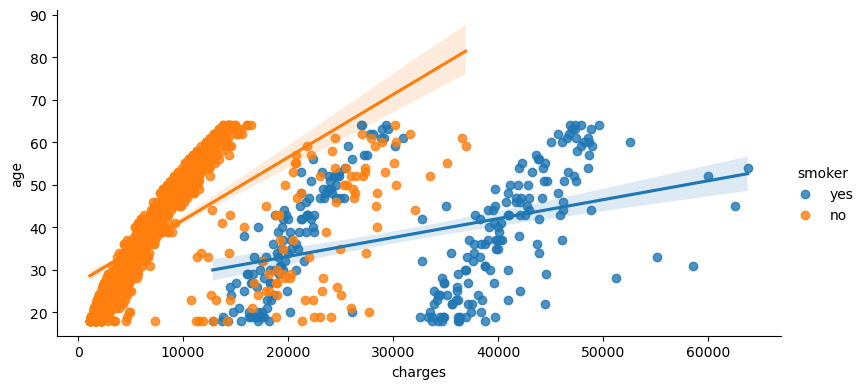

In [5]:
sns.lmplot(x='charges', y='age', hue='smoker', data=data, height=4, aspect=2)
plt.show()

In [6]:
def boxplot(data, x, y, h):
  fig, ax = plt.subplots(figsize=(10,4))
  box = sns.boxplot(x=x, y=y, hue=h, data=data)
  box.set_xticklabels(box.get_xticklabels())
  fig.subplots_adjust(bottom=0.2)
  plt.tight_layout()

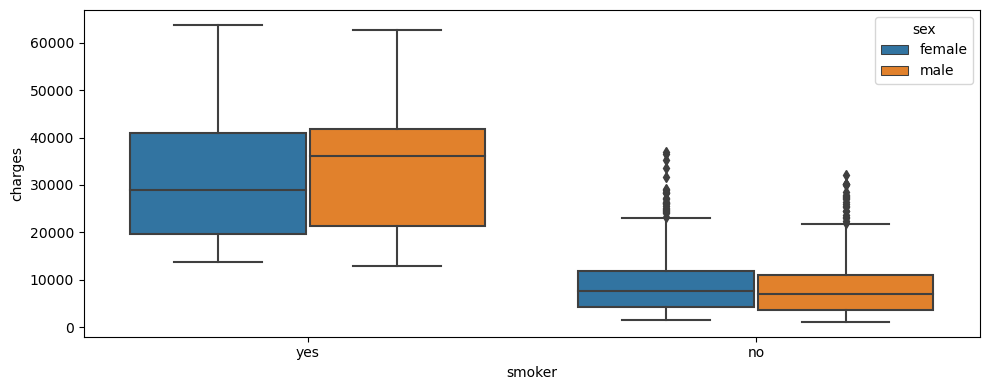

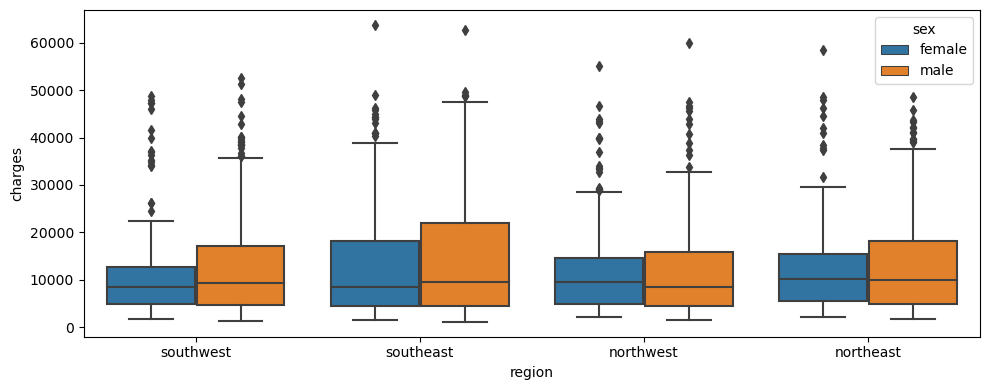

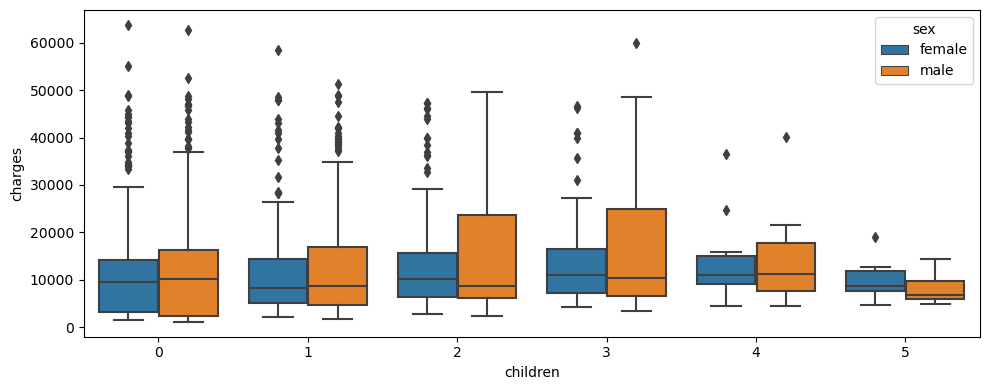

In [7]:
boxplot(data, 'smoker', 'charges', 'sex')
boxplot(data, 'region', 'charges', 'sex')
boxplot(data, 'children', 'charges', 'sex')

In [8]:
# encode categorical features
label_encoder = LabelEncoder()

for col_name in data.columns:
    if (is_string_dtype(data[col_name])):
        data[col_name] = label_encoder.fit_transform(data[col_name])
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


In [9]:
X = data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:3])

[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459
   0.2985838 ]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455
  -0.95368917]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455
  -0.72867467]]


In [10]:
# apply hierarchical clustering 
cluster_model = AgglomerativeClustering(distance_threshold=40, n_clusters=None)
predicted_segments = cluster_model.fit_predict(X_scaled)

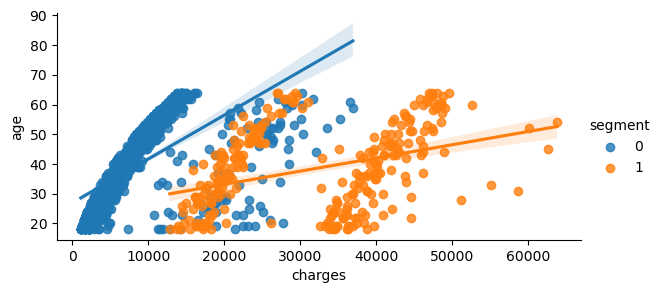

In [11]:
# add predictions to data as a new column
data['segment'] = predicted_segments

# create a scatter plot of the first two features, colored by segment
sns.lmplot(x="charges", y="age", hue="segment", data=data, aspect=2, height = 3)
plt.show()

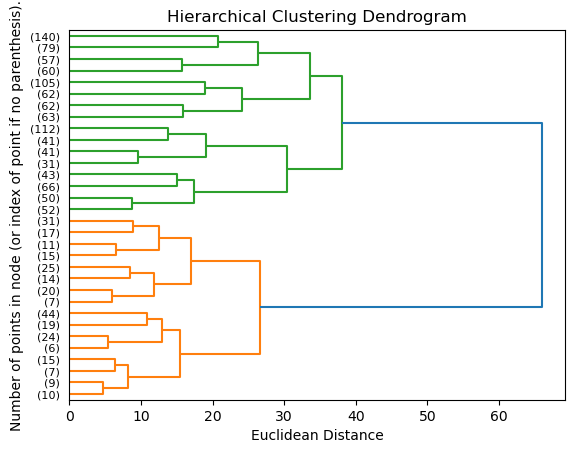

In [17]:
# Visualize data similarity in a dendogram
def plot_dendrogram(model, **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, orientation='right',**kwargs)


plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(cluster_model, truncate_mode="level", p=4)
plt.xlabel("Euclidean Distance")
plt.ylabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

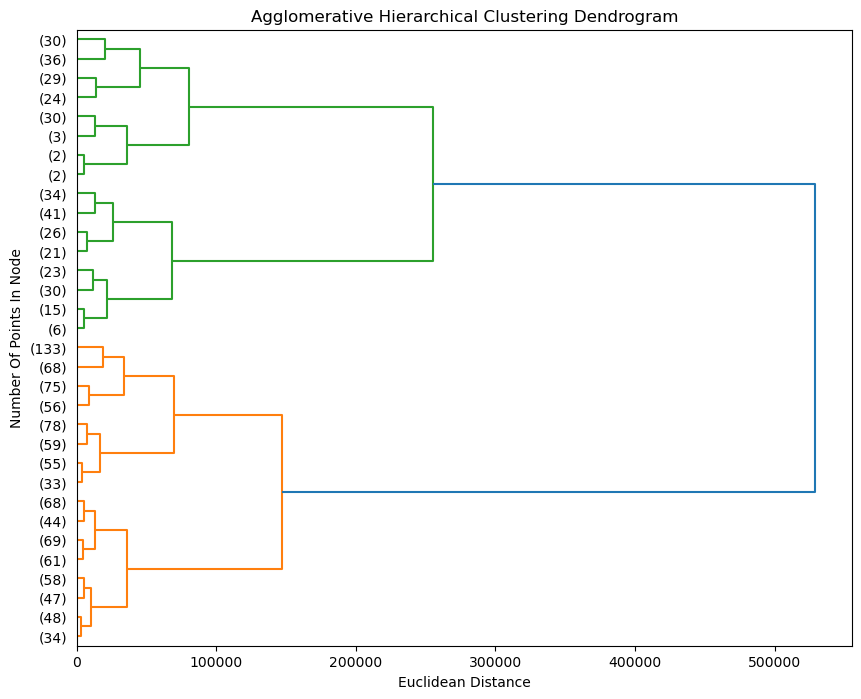

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 8))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
dend = shc.dendrogram(shc.linkage(X, method='ward'),truncate_mode='level',p=4, orientation='right', leaf_font_size=10, leaf_rotation=0)
plt.xlabel("Euclidean Distance")
plt.ylabel("Number Of Points In Node")
plt.show()